In [366]:
import os
cwd=os.getcwd()
os.chdir('/content/drive/My Drive/Colab Notebooks/JantaHackJul25')

In [367]:
import pandas as pd
train = pd.read_csv('train_yaOffsB.csv')
test = pd.read_csv('test_pFkWwen.csv')

# Data Pre-Processing


## AutoEDA


In [2]:
#Automated EDA using sweetviz
!pip install sweetviz

In [4]:
import sweetviz as sv
training_report = sv.analyze(train)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!
Report train_yaOffsB.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Null Value Treatment

In [368]:
#Manual EDA and Null Value Treatment
train.head()

ID  Estimated_Insects_Count  ...  Season  Crop_Damage
0  F00000001                      188  ...       1            0
1  F00000003                      209  ...       2            1
2  F00000004                      257  ...       2            1
3  F00000005                      257  ...       2            1
4  F00000006                      342  ...       2            1

[5 rows x 10 columns]

In [369]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [370]:
train.info()
'''Indicates missing values'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


'Indicates missing values'

In [371]:
train.isnull().sum()
#this represents 10% of the total counts

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [372]:
# deleting all the null valued rows
#train = train.dropna()

In [373]:
# imputing values; will check if the model doesnt work properly
train.fillna(train.mean(), inplace=True)

## Train-Test Split

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
train = train.drop(columns=['ID'])

In [376]:
X = train.drop(columns = ['Crop_Damage'])
y = train['Crop_Damage']

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Data Scaling

In [378]:
# Robust Scalar
from sklearn.preprocessing import RobustScaler

In [379]:
x_columns = X_train.columns

In [380]:
list(x_columns)

['Estimated_Insects_Count',
 'Crop_Type',
 'Soil_Type',
 'Pesticide_Use_Category',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Season']

In [381]:
scaler = RobustScaler()

X_train[list(x_columns)] = scaler.fit_transform(X_train[list(x_columns)])

X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Estimated_Insects_Count  Crop_Type  ...  Number_Weeks_Quit  Season
21726                -0.620394        0.0  ...             0.3125     0.0
63783                -0.068552        0.0  ...            -0.4375     0.0
83288                 1.264781        0.0  ...             1.2500     0.0
51627                 0.688089        1.0  ...            -0.4375     0.0
32141                -0.195373        0.0  ...             0.3125     1.0

[5 rows x 8 columns]

In [382]:
X_train.shape

(62200, 8)

## Correlation

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

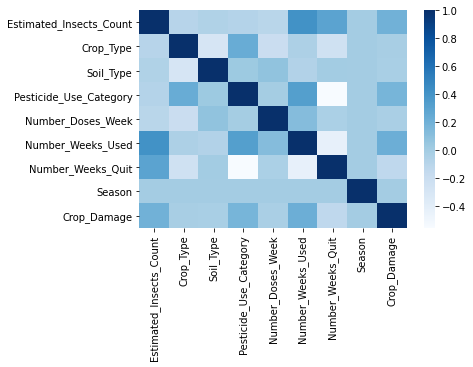

In [358]:
plt.figure(figsize=(6,4))
sns.heatmap(train.corr(),cmap='Blues',annot=False)

## One Hot Encoding


In [359]:
#X_train = pd.get_dummies(data=X_train, columns=['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category','Season'])
#y_train = pd.get_dummies(data=y_train, columns=['Crop_Damage'])
#X_test = pd.get_dummies(data=X_test, columns=['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category','Season'])
#y_test = pd.get_dummies(data=y_test, columns=['Crop_Damage'])

# Model Prototyping

## Inital Model Training

In [383]:
#Random Forest Approach
from sklearn.metrics import accuracy_score

In [384]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model 
rf = RandomForestClassifier(n_estimators= 10, random_state=42)
# Train the model on training data
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', round(accuracy, 2), '%.')
# THIS IS THE BASELINE MODEL

Accuracy: 0.83 %.


In [385]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [363]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 80, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 17, 24, 31, 38, 45, 52, 59, 66, 73, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
import joblib
import pickle
filename = 'best_random_FOREST_BIGGER_LEAF.sav'
joblib.dump(best_random, filename)

## Second Model Training

In [269]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import joblib
import pickle
filename = 'XGBOOST_IMPUTED.sav'
joblib.dump(best_xgboost_random, filename)

## Predictions

In [200]:
import joblib
best_random_XGBOOST = joblib.load('XGBOOST_IMPUTED.sav')

[15:41:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [201]:
ID = test['ID']
test= test.drop(columns=['ID'])

In [202]:
test.fillna(test.mean(), inplace=True)

In [203]:
test

Estimated_Insects_Count  Crop_Type  ...  Number_Weeks_Quit  Season
0                          188          1  ...                  0       2
1                          410          1  ...                  0       2
2                          626          1  ...                  0       2
3                          731          1  ...                  0       2
4                          789          0  ...                  0       1
...                        ...        ...  ...                ...     ...
59305                     3337          1  ...                 12       1
59306                     3516          1  ...                 10       2
59307                     3702          1  ...                 48       1
59308                     3702          1  ...                 17       2
59309                     3895          1  ...                  7       1

[59310 rows x 8 columns]

In [204]:
# Robust Scalar
from sklearn.preprocessing import RobustScaler
x_columns_test = test.columns
scaler = RobustScaler()
test[list(x_columns_test)] = scaler.fit_transform(test[list(x_columns_test)])
test.head()

Estimated_Insects_Count  Crop_Type  ...  Number_Weeks_Quit  Season
0                -0.877464        1.0  ...            -0.4375     0.0
1                -0.687232        1.0  ...            -0.4375     0.0
2                -0.502142        1.0  ...            -0.4375     0.0
3                -0.412168        1.0  ...            -0.4375     0.0
4                -0.362468        0.0  ...            -0.4375    -1.0

[5 rows x 8 columns]

In [205]:
'''SAVE PREDICTIONS'''
prediction = best_random_XGBOOST.predict(test)

In [206]:
prediction

array([1.1404083 , 0.9313292 , 0.9498247 , ..., 0.218972  , 0.31664264,
       0.12515718], dtype=float32)

In [207]:
import numpy as np
np.unique(prediction)

array([-0.2633915 , -0.26311684, -0.25339526, ...,  1.5364432 ,
        1.5367081 ,  1.7157723 ], dtype=float32)

In [208]:
ID = pd.DataFrame(ID, columns=['ID'])

In [209]:
ID

ID
0      F00000002
1      F00000007
2      F00000011
3      F00000013
4      F00000014
...          ...
59305  F00155937
59306  F00155940
59307  F00155941
59308  F00155943
59309  F00155944

[59310 rows x 1 columns]

In [210]:
ID['Crop_Damage']= list(prediction)

In [211]:
ID.to_csv('best_random_xgb.csv',index=False)